In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read and explore the given dataset

In [262]:
data = pd.read_csv("ratings_Electronics_Ver3.csv")

In [263]:
data.columns = ["userId","productId","rating", "timestamp"]

In [264]:
data.head()

,userId,productId,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
1,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
2,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
3,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09
4,A1QGNMC6O1VW39,0511189877,5.0,1.397434e+09


In [265]:
data.shape

(7824482, 4)

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
rating       float64
timestamp    float64
dtypes: float64(2), object(2)
memory usage: 238.8+ MB


In [267]:
data.dropna(inplace=True)

In [268]:
data.shape

(7824481, 4)

In [269]:
data.userId.unique().shape

(4201696,)

In [270]:
data.productId.unique().shape

(476001,)

In [271]:
ratings = pd.DataFrame(data.groupby('productId')['rating'].mean())
ratings.head()

,rating
productId,
0321732944,5.000000
0439886341,1.666667
0511189877,4.500000
0528881469,2.851852
0558835155,3.000000


In [272]:
ratings['number_of_ratings'] = data.groupby('productId')['rating'].count()
ratings.head()

,rating,number_of_ratings
productId,,
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27
0558835155,3.000000,1


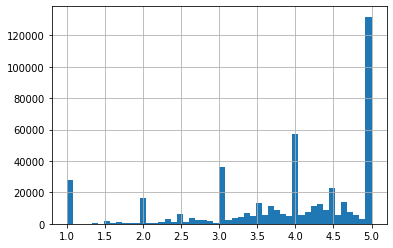

In [273]:
ratings['rating'].hist(bins=50)

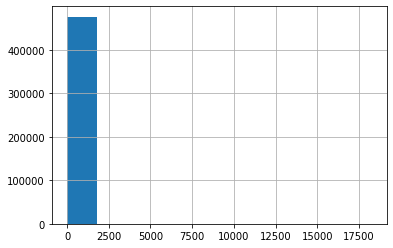

In [274]:
ratings['number_of_ratings'].hist()

1. There are 4201696 number of users and 476001 number are products.
2. More number of users gave 5 rating.

# Take a subset of the dataset to make it less sparse/ denser

In [275]:
counts = data['userId'].value_counts()

In [276]:
counts

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A2M6UT8THOJOM1      1
A8Y5A88ILD97L       1
A12HLSOETQPOJW      1
A16ZZYU77ZIQLK      1
A145NXNTWR7696      1
Name: userId, Length: 4201696, dtype: int64

In [277]:
new_data = data[data['userId'].isin(counts[counts>=50].index)]
new_data.shape

(125871, 4)

In [278]:
counts = new_data['userId'].value_counts()
counts

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A3SP7T2PZ3HSDE     50
A37PV5GMP2ILJC     50
ANEXFROORI6F6      50
A19N3S7CBSU6O7     50
A1DSRM2P0WGQNS     50
Name: userId, Length: 1540, dtype: int64

In [279]:
new_data

,userId,productId,rating,timestamp
93,A3BY5KCNQZXV5U,0594451647,5.0,1.390176e+09
117,AT09WGFUM934H,0594481813,3.0,1.377907e+09
176,A32HSNCNPRUMTR,0970407998,1.0,1.319674e+09
177,A17HMM1M7T9PJ1,0970407998,4.0,1.281744e+09
491,A3CLWR1UUZT6TG,0972683275,5.0,1.373587e+09
...,...,...,...,...
7824425,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,1.405642e+09
7824426,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0,1.405210e+09
7824435,A3AYSYSLHU26U9,B00LI4ZZO8,4.0,1.405296e+09
7824437,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0,1.405210e+09


# Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [280]:
from sklearn.model_selection import train_test_split

In [281]:
new_data = new_data.sample(frac = 0.1) #taking 10 percent of data

In [282]:
new_data.shape

(12587, 4)

In [283]:
train_data, test_data = train_test_split(new_data, test_size=.30, random_state=100)

In [284]:
train_data.head()

,userId,productId,rating,timestamp
4065763,A9ELHLPXF7JKD,B004F1NZTS,3.0,1.318205e+09
3716326,A1P3DDFL423B3C,B003ZTU0OO,4.0,1.302134e+09
3857216,A36K2N527TXXJN,B004444O5U,5.0,1.295395e+09
5273471,A16SRDVPBXN69C,B00622AG6S,5.0,1.372464e+09
816957,AZOK5STV85FBJ,B000CSOJ2K,5.0,1.330646e+09


In [285]:
test_data.head()

,userId,productId,rating,timestamp
4605718,AT28RL25Q2OLK,B004ZSH452,5.0,1.337904e+09
5508377,A2SZLNSI5KOQJT,B006WVR9GY,4.0,1.338422e+09
692590,A19XPAWSWDRI3B,B0009Y7APU,5.0,1.395187e+09
536020,A1ODOGXEYECQQ8,B00062QY5W,5.0,1.200787e+09
323826,A1X3DA7C61WZLQ,B0000AZ67Z,3.0,1.082592e+09


In [286]:
train_data.shape

(8810, 4)

In [287]:
test_data.shape

(3777, 4)

# Build Popularity Recommender model

In [288]:
def popularity_model(data, k = 5):
    ratings_mean_count = data.groupby('productId').agg({'rating': 'count'}).reset_index()
    ratings_mean_count.rename(columns = {'rating': 'score'},inplace=True)
    data_sort = ratings_mean_count.sort_values(['score', 'productId'], ascending = [0,1])
    data_sort['Rank'] = data_sort['score'].rank(ascending=0, method='first')
    return data_sort.head(k)

In [289]:
ratings = popularity_model(train_data,10)

In [290]:
ratings

,productId,score,Rank
3290,B003ES5ZUU,18,1.0
5360,B0088CJT4U,15,2.0
5314,B00829TIEK,13,3.0
3000,B002WE6D44,12,4.0
1303,B000N99BBC,11,5.0
1909,B0019EHU8G,11,6.0
2968,B002V88HFE,11,7.0
2895,B002R5AM7C,10,8.0
4488,B005CT56F8,10,9.0
5313,B00829TIA4,10,10.0


# Build Collaborative Filtering model.

In [291]:
from surprise import SVD
from scipy.sparse.linalg import svds
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

In [292]:
reader = Reader(rating_scale=(1, 5))

In [293]:
model_data = Dataset.load_from_df(new_data[["userId", "productId", "rating"]], reader)

In [294]:
trainset, testset = train_test_split(model_data, test_size=0.3, random_state=100)

In [295]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


# Evaluate both the models

In [296]:
predictions = algo.test(testset)

In [297]:
predictions

[Prediction(uid='A1E3OB6QMBKRYZ', iid='B0044IOGG8', r_ui=2.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3IJ4Z18FTIIP', iid='B002HWRJY4', r_ui=5.0, est=4.75, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1SX9PHJWTDMF9', iid='B00006I5L0', r_ui=3.0, est=4.245856980703746, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3VBZDYGHF4NK8', iid='B00BWHILCY', r_ui=5.0, est=4.75, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1XXMNLOLKNO0I', iid='B005IKJ62A', r_ui=5.0, est=4.245856980703746, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2AX2UGB167J31', iid='B008DJTAAQ', r_ui=5.0, est=4.245856980703746, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1435P5AMCPB3X', iid='B00004I9W2', r_ui=5.0, est=4.245856980703746, details={'was_impossible': True, 'reason': 'User and/or item is unk

In [298]:
accuracy.rmse(predictions, verbose=True)

RMSE: 1.1324


1.1323698846463133

# Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products

In [299]:
predictions_df = pd.DataFrame([[x.uid, x.iid, x.est] for x in predictions])

In [300]:
predictions_df.columns = ['userId', 'productId', 'est_rating']

In [301]:
predictions_df.sort_values(by=['userId','est_rating'], ascending=False, inplace=True)

In [302]:
predictions_df.sample(10)

,userId,productId,est_rating
3270,A1K4G5YJDJQI6Q,B001N9S9P0,4.245857
3652,A376OJHLE6SU9Q,B0079R8IYW,4.245857
802,A7KBAXO177NND,B004MNG3F2,4.245857
3708,A3EZEP0FX5BC1P,B0044DHU84,1.000000
1253,A3HPCRD9RX351S,B00JF0D7RE,4.245857
2836,A3L1VJMHFWONCB,B00GWFE102,4.245857
2878,A6TBR6L2D4XKC,B00972M942,5.000000
1953,A359MYLPLEOF7N,B00BF6IKL4,4.245857
3407,AAR7CEPXYJA0T,B001IAYUM0,4.245857
1822,A1RPJHUVVSI98A,B000EGI7V4,5.000000


In [303]:
predictions_df.groupby('userId').head(10).reset_index(drop=True)

,userId,productId,est_rating
0,AZOK5STV85FBJ,B000GL3MOY,4.245857
1,AZNUHQSHZHSUE,B00519ASQG,4.245857
2,AZNUHQSHZHSUE,B00AXZWG8Q,4.000000
3,AZMY6E8B52L2T,B0019EHU8G,5.000000
4,AZMY6E8B52L2T,B000FBK3QK,5.000000
...,...,...,...
3726,A100UD67AHFODS,B00F0DD0I6,5.000000
3727,A100UD67AHFODS,B000LRMS66,4.714286
3728,A100UD67AHFODS,B002K9GCU6,4.245857
3729,A100UD67AHFODS,B00005T3X7,4.245857


In [304]:
predictions_df[predictions_df.userId == 'A100UD67AHFODS'].head(5)

,userId,productId,est_rating
360,A100UD67AHFODS,B00F0DD0I6,5.000000
2618,A100UD67AHFODS,B000LRMS66,4.714286
2174,A100UD67AHFODS,B002K9GCU6,4.245857
2469,A100UD67AHFODS,B00005T3X7,4.245857
2793,A100UD67AHFODS,B001FVMQEQ,4.245857
